# Sujet 2 : le pouvoir d'achat des ouvriers anglais du XVIe au XIXe siècle

## **Description du sujet**

[William Playfair](https://fr.wikipedia.org/wiki/William_Playfair) était un des pionniers de la présentation graphique des données. Il est notamment considéré comme l'inventeur de l'histogramme. Un de ses graphes célèbres, tiré de son livre "[A Letter on Our Agricultural Distresses, Their Causes and Remedies](https://books.google.fr/books/about/A_Letter_on_Our_Agricultural_Distresses.html?id=aQZGAQAAMAAJ)", montre [l'évolution du prix du blé et du salaire moyen entre 1565 et 1821](https://fr.wikipedia.org/wiki/William_Playfair#/media/File:Chart_Showing_at_One_View_the_Price_of_the_Quarter_of_Wheat,_and_Wages_of_Labour_by_the_Week,_from_1565_to_1821.png). Playfair n'a pas publié les données numériques brutes qu'il a utilisées, car à son époque la réplicabilité n'était pas encore considérée comme essentielle. Des [valeurs obtenues par numérisation du graphe](https://vincentarelbundock.github.io/Rdatasets/doc/HistData/Wheat.html) sont aujourd'hui téléchargeables, la [version en format CSV](https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv) étant la plus pratique.

Quelques remarques pour la compréhension des données :
- Jusqu'en 1971, la livre sterling était divisée en 20 shillings, et un shilling en 12 pences.
- Le prix du blé est donné en shillings pour un quart de boisseau de blé. Un quart de boisseau équivaut 15 livres britanniques ou 6,8 kg.
- Les salaires sont donnés en shillings par semaine.

Votre mission si vous l'acceptez :
1. Votre première tâche est de reproduire le graphe de Playfair à partir des données numériques. Représentez, comme Playfair, le prix du blé par des barres et les salaires par une surface bleue délimitée par une courbe rouge. Superposez les deux de la même façon dans un seul graphique. Le style de votre graphique pourra rester différent par rapport à l'original, mais l'impression globale devrait être la même.

2. Par la suite, améliorez la présentation de ces données. Pour commencer, Playfair a combiné les deux quantités dans un même graphique en simplifiant les unités "shillings par quart de boisseau de blé" et "shillings par semaine" à un simple "shillings", ce qui aujourd'hui n'est plus admissible. Utilisez deux ordonnées différentes, une à gauche et une à droite, et indiquez les unités correctes. À cette occasion, n'hésitez pas à proposer d'autres représentations que des barres et des surface/courbes pour les deux jeux de données si ceci vous paraît judicieux.

3. L'objectif de Playfair était de montrer que le pouvoir d'achat des ouvriers avait augmenté au cours du temps. Essayez de mieux faire ressortir cette information. Pour cela, faites une représentation graphique du pouvoir d'achat au cours du temps, définie comme la quantité de blé qu'un ouvrier peut acheter avec son salaire hebdomadaire. Dans un autre graphique, montrez les deux quantités (prix du blé, salaire) sur deux axes différents, sans l'axe du temps. Trouvez une autre façon d'indiquer la progression du temps dans ce graphique. Quelle représentation des données vous paraît la plus claire ? N'hésitez pas à en proposer d'autres. 

4. Déposer dans FUN votre résultat

## 1. Répresentation des données

    a) Téléchargement des données et librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv", skiprows=0)

    b) Représentation graphique

On commence par vérifier que le jeu de données est bien chargé.

In [2]:
df.head()

Unnamed: 0  Year  Wheat  Wages
0           1  1565   41.0   5.00
1           2  1570   45.0   5.05
2           3  1575   42.0   5.08
3           4  1580   49.0   5.12
4           5  1585   41.5   5.15

On cherche s'il manque des données et on les élimine.

In [3]:
data2 = df.dropna()

On peut maintenant reproduire le graphe de William Playfair :

Text(1632,9,'Weekly Wages of a Good Mechanic')

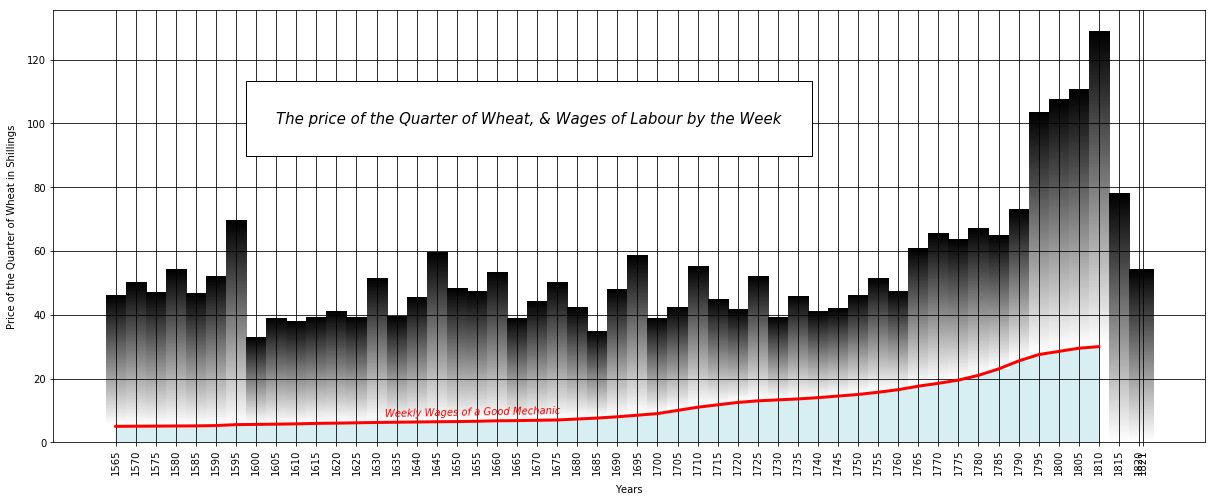

In [4]:
data = pd.DataFrame(df, columns=['Year', 'Wheat'])
index = data['Year']
values = data['Wheat']

fig, ax = plt.subplots(figsize=(18,10))
bar = ax.bar(index,values, bottom = np.nan_to_num(df["Wages"]), width=5)
plt.tight_layout()
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.subplots_adjust(top=0.8, bottom=0.2, left=0.1)

def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,100)).T
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor('none')
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x,x+w,y,y+h], aspect='auto', zorder=1, cmap = plt.get_cmap ('gist_gray'))
    ax.axis(lim)
gradientbars(bar)


plt.plot(data2["Year"],data2["Wages"], color = 'r', linewidth = 3)
plt.fill_between(df["Year"],y1 = df["Wages"], color='powderblue', alpha= 0.5)
plt.xlabel("Years", labelpad=10)
plt.ylabel("Price of the Quarter of Wheat in Shillings", labelpad=10)

plt.xticks(df["Year"], rotation=90)
ax.set_facecolor('w')
ax.grid(axis='both',linestyle='-', color='k')
ax.text(1605, 100, 'The price of the Quarter of Wheat, & Wages of Labour by the Week', style='italic', fontsize=15,
        bbox={'facecolor': 'white', 'alpha': 1, 'pad': 30})

ax.text(1632, 9, 'Weekly Wages of a Good Mechanic', style='italic', fontsize=10, color = "red",
        bbox={'facecolor': 'white', 'alpha': 0, 'pad': 10}, rotation = 1)

## 2. Amélioration de la représentation des données : double ordonnées

Text(1632,36,'Weekly Wages of a Good Mechanic')

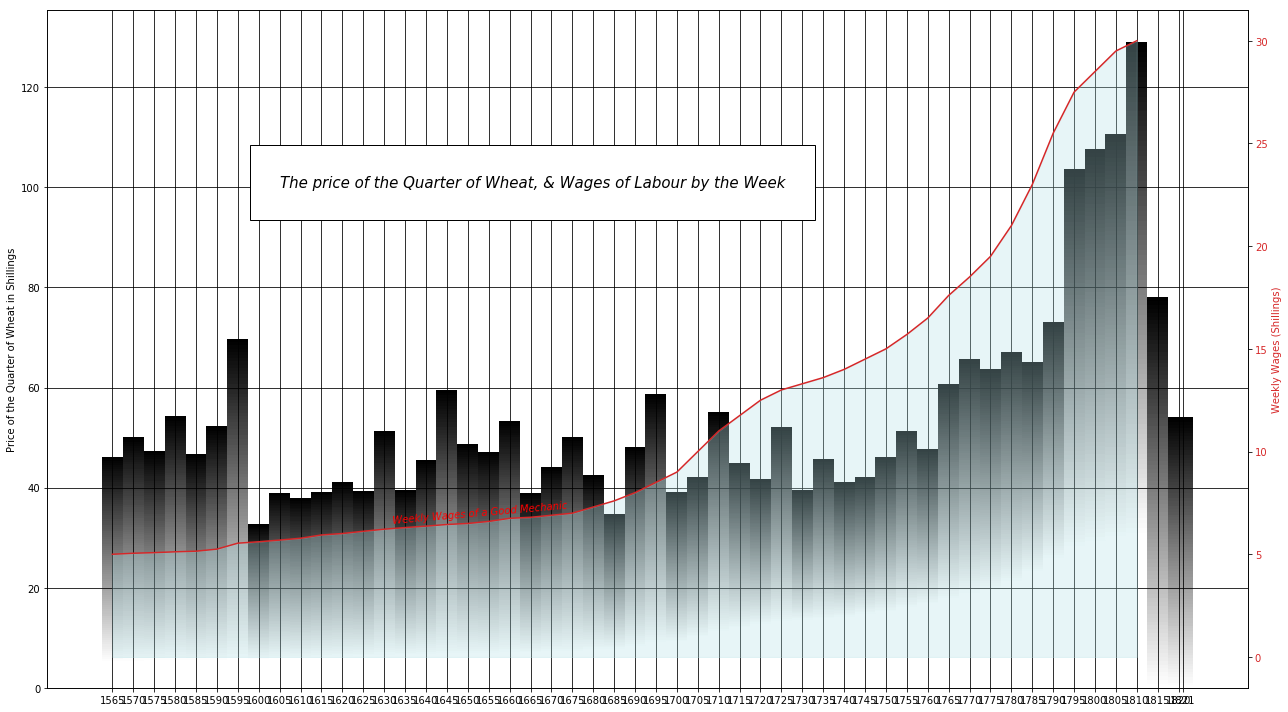

In [5]:
fig, ax = plt.subplots(figsize=(18,10))
bar = ax.bar(index,values, bottom = np.nan_to_num(df["Wages"]), width=5)
plt.tight_layout()
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.subplots_adjust(top=0.8, bottom=0.2, left=0.1)

def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,100)).T
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor('none')
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x,x+w,y,y+h], aspect='auto', zorder=1, cmap = plt.get_cmap ('gist_gray'))
    ax.axis(lim)
gradientbars(bar)
ax. set_ylabel("Price of the Quarter of Wheat in Shillings", color = 'k')
ax2 = ax.twinx()

color = 'tab:red'
ax2.set_ylabel('Weekly Wages (Shillings)', color=color)
ax2.plot(df["Year"], df["Wages"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.fill_between(df["Year"], y1 = df["Wages"], color='powderblue', alpha= 0.3)

fig.tight_layout()  

plt.xticks(df["Year"], rotation=90)
ax.set_facecolor('w')
ax.grid(axis='both',linestyle='-', color='k')
ax.text(1605, 100, 'The price of the Quarter of Wheat, & Wages of Labour by the Week', style='italic', fontsize=15,
        bbox={'facecolor': 'white', 'alpha': 1, 'pad': 30})

ax.text(1632, 36, 'Weekly Wages of a Good Mechanic', style='italic', fontsize=10, color = "red",
        bbox={'facecolor': 'white', 'alpha': 0, 'pad': 10}, rotation=5)




On peut représenter plus simplement les données avec deux courbes.

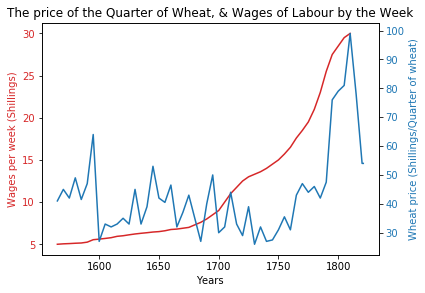

In [6]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Wages per week (Shillings)', color=color)
ax1.plot(data2["Year"], data2["Wages"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Wheat price (Shillings/Quarter of wheat)', color=color) 
ax2.plot(df["Year"], df["Wheat"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 

plt.title('The price of the Quarter of Wheat, & Wages of Labour by the Week')
plt.show()

## 3. Mise en évidence de l'augmentation du pouvoir d'achat des Anglais

Text(0.5,1,'Quantity of wheat that can be purchased according to the monthly salary over the years')

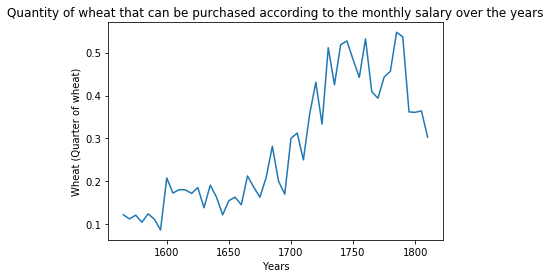

In [7]:
ble = data2["Wheat"]
salaire = data2["Wages"]
pouvoir_achat = salaire/ble

plt.plot(data2["Year"], pouvoir_achat)
plt.xlabel("Years")
plt.ylabel("Wheat (Quarter of wheat)")
plt.title("Quantity of wheat that can be purchased according to the monthly salary over the years")


Text(0.5,1,'Purchasing power of wheat over wages')

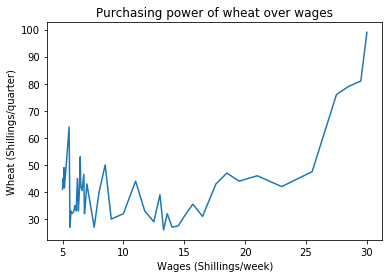

In [8]:
plt.plot(df["Wages"], df["Wheat"])
plt.xlabel("Wages (Shillings/week)")
plt.ylabel("Wheat (Shillings/quarter)")
plt.title("Purchasing power of wheat over wages")

De ces deux représentations, qui sont censés donner une idée du pouvoir d'achat des anglais par rapport au prix du blé, on se rend compte visuellement, que l'information donnée n'est pas la même. Sur le premier graphe, il semble que le pouvoir d'achat du blé augmente dans le temps, jusqu'à 1790, puis chute. Le second graphique quand a lui, semble montrer que le prix du blé augment en même temps que les salaires. Selon moi, l'information la plus claire est celle du premier graphe. 